# Simulação da Disponibilidade de Serviços em um Sistema Distribuído

---

## Formula para calcular disponibilidade de um serviço

A formula é definida em termos dos seguintes parâmetros:
    
    n - número de servidores(n > 0)

    k - número mínimo de servidores disponíveis necessários para o serviço ser acessado de forma consistente (0 < k <= n)

    p - probabilidade de cada servidor estar disponível em um dado instante (0 <= p <= 1)


$$
\sum_{i=k}^n \binom{n}{i} \times p^i \times (1-p)^{n - i}
$$

---

## Preparar ambiente

In [29]:
# bibliotecas importantes
import numpy as np
import matplotlib.pyplot as plt
from math import comb

from src.classes.visualize import SimulatorVisualizer
from src.classes.simulator import Simulator, Recorte

## Simulador estocastico

In [23]:
# simular 10 servidores, com k = [1, 10] e p = [0.01, 1]
op = Simulator(20, "1-20", "100-1000", step_p=100, rounds=10000) 

In [24]:
# criar objeto para gerar visualização das simulações
visualize = SimulatorVisualizer(op)

### Fixando valor de p em 0.4

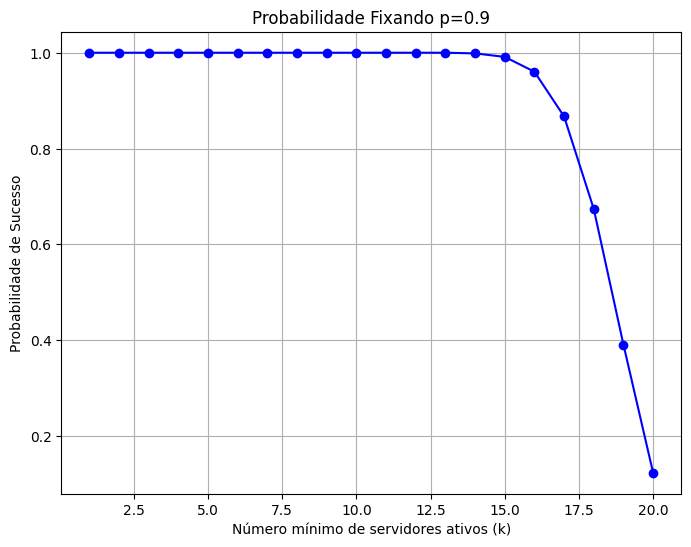

In [26]:
visualize.plot_fixed_availability_curve(value_fix=0.9,flag=True)

### Fixando valor de k em 4

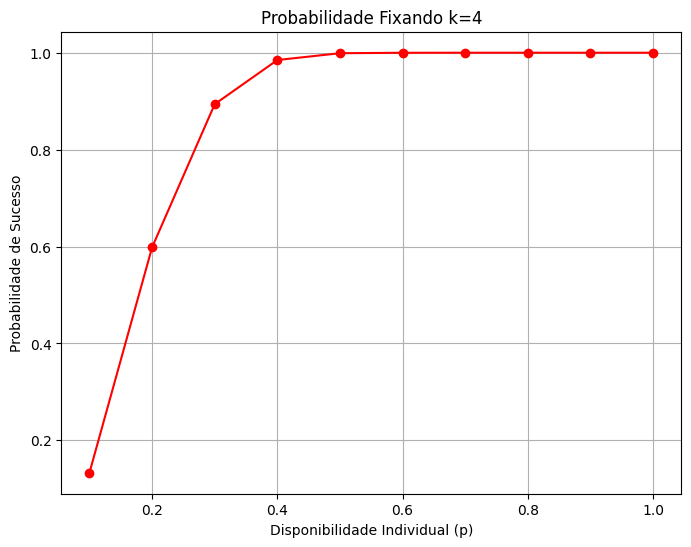

In [27]:
visualize.plot_fixed_availability_curve(value_fix=4,flag=False)

### Visualizar curvas de disponibilidade de todas as combinações

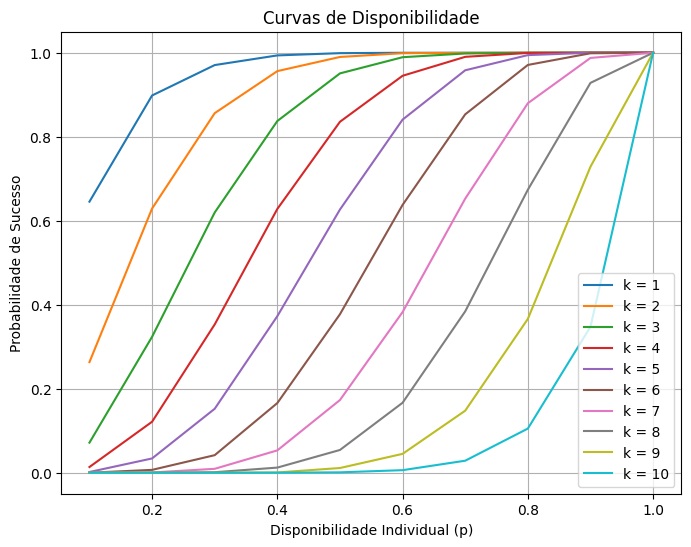

In [19]:
visualize.plot_availability_curves()

### Heatmap com todas as combinações de k e p para n servidores

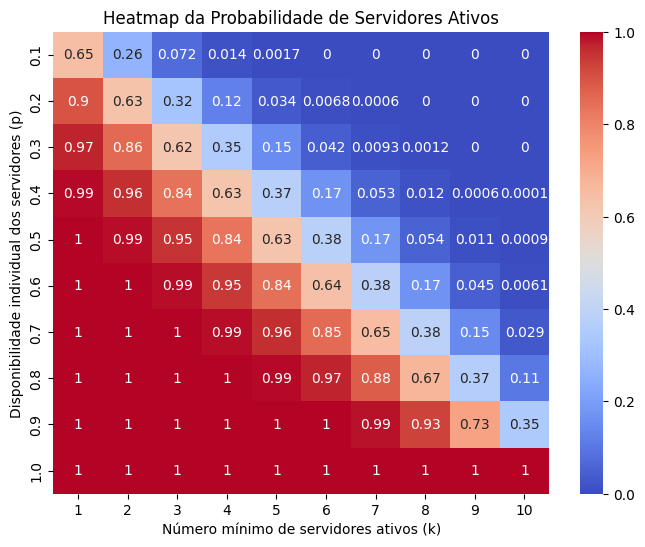

In [20]:
visualize.plot_heatmap()

## Implementação da função de disponibilidade

In [28]:

def binomial_prob(n, k, p):
    """Retorna a probabilidade de pelo menos k servidores estarem ativos."""
    return sum(comb(n, i) * (p**i) * ((1 - p) ** (n - i)) for i in range(k, n+1))


### Plotar função

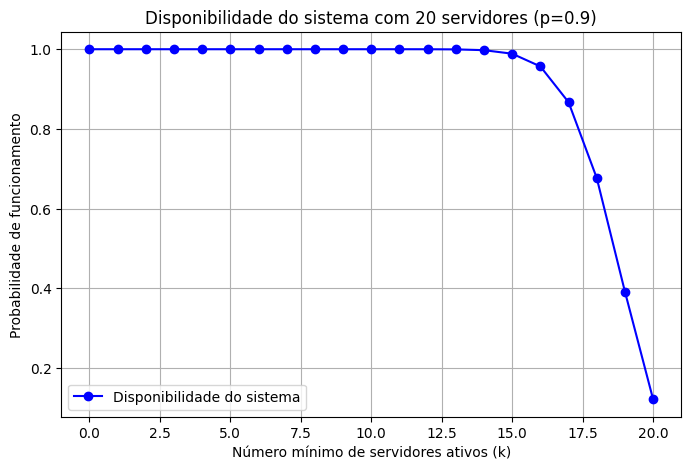

In [35]:
# Parâmetros
n = 20  # Número total de servidores
p = 0.9  # Probabilidade de cada servidor estar ativo

k_values = np.arange(0, n+1)
probabilities = [binomial_prob(n, k, p) for k in k_values]


plt.figure(figsize=(8, 5))
plt.plot(k_values, probabilities, marker='o', linestyle='-', color='b', label='Disponibilidade do sistema')
plt.xlabel('Número mínimo de servidores ativos (k)')
plt.ylabel('Probabilidade de funcionamento')
plt.title(f'Disponibilidade do sistema com {n} servidores (p={p})')
plt.grid(True)
plt.legend()
plt.show()

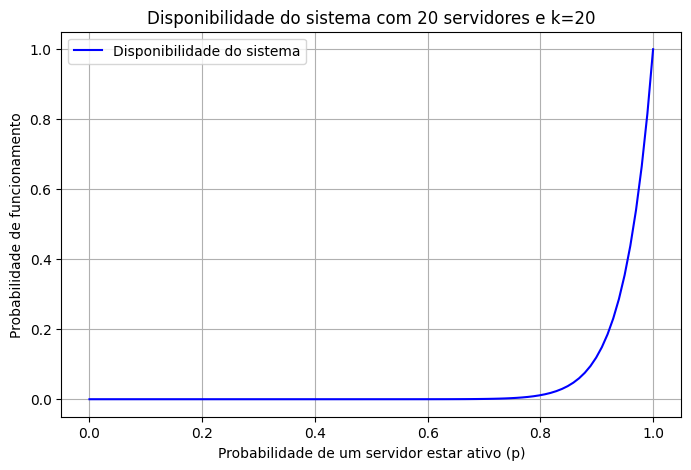

In [36]:
# Parâmetros fixos
n = 20  # Número total de servidores
k = 20  # Número mínimo de servidores ativos para o sistema funcionar

# Variar p de 0 a 1
p_values = np.linspace(0, 1, 100)
probabilities = [binomial_prob(n, k, p) for p in p_values]


plt.figure(figsize=(8, 5))
plt.plot(p_values, probabilities, color='b', label=f'Disponibilidade do sistema')
plt.xlabel('Probabilidade de um servidor estar ativo (p)')
plt.ylabel('Probabilidade de funcionamento')
plt.title(f'Disponibilidade do sistema com {n} servidores e k={k}')
plt.grid(True)
plt.legend()
plt.show()